In [1]:
from qiskit import QuantumCircuit, Aer
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram
import numpy as np
import pickle

In [2]:
provider = IBMProvider()
backend = provider.get_backend("ibm_oslo")

# Load Pickle

In [3]:
qcs: list[QuantumCircuit]
tqcs: list[QuantumCircuit]
qcs, tqcs = pickle.load( open( 'snooping_qcs_{}.pickle'.format(backend.name), "rb" ) )

In [4]:
# TODO: pickle these and don't pickle tqcs

k_max = 20
max_other_gates = 30
random_circs_per_k = 60

q1 = 3
q2 = 5
snoopers = (1,4,6)

# Analyse Results

In [5]:
job = provider.backend.retrieve_job('cg4bu50ejejmhbhanqk0')

# Check

In [6]:
tqcs = job.circuits()

In [7]:
qc_res_counts = job.result().get_counts()

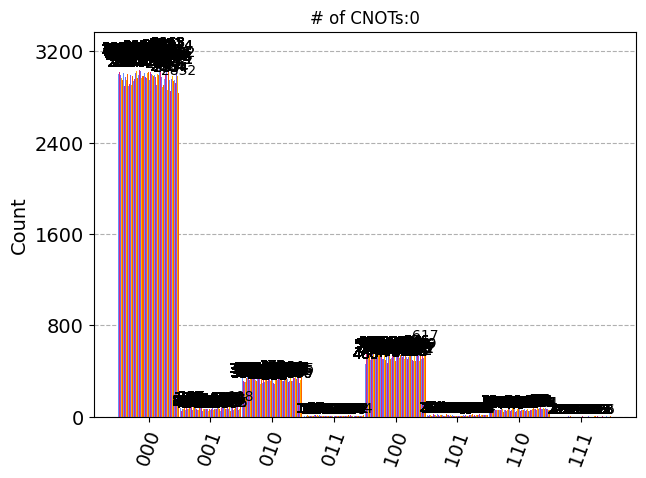

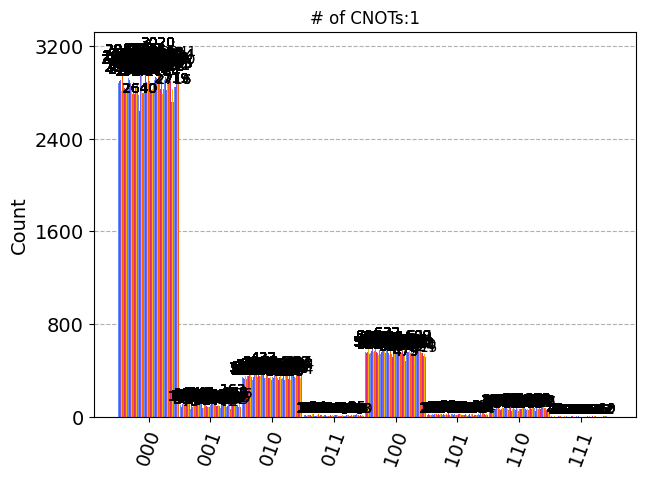

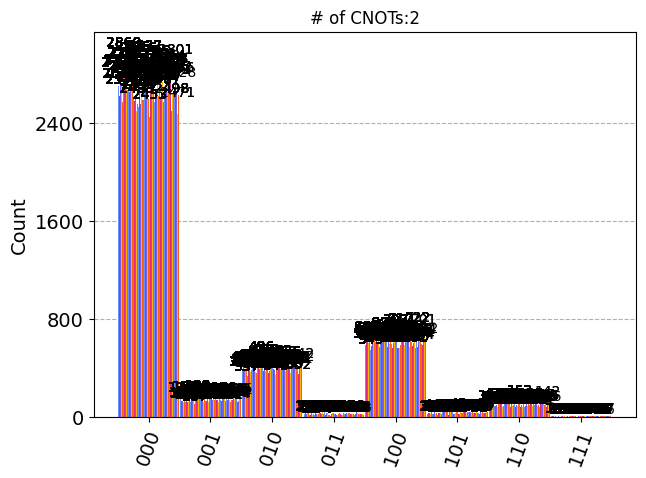

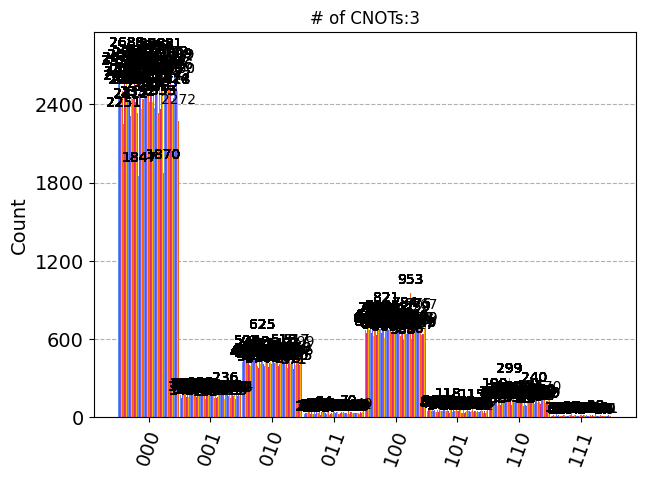

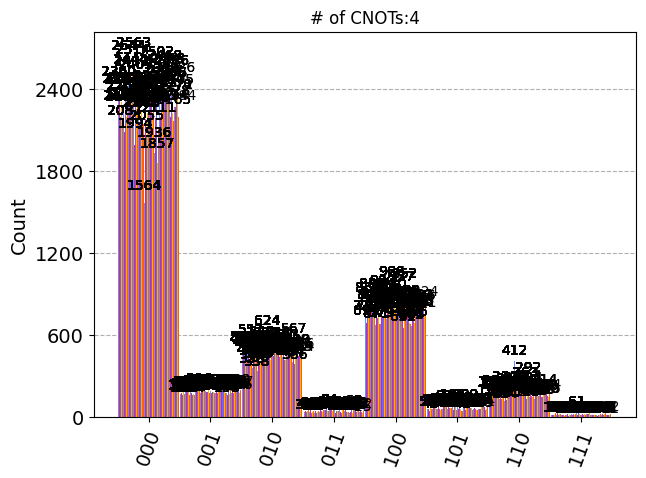

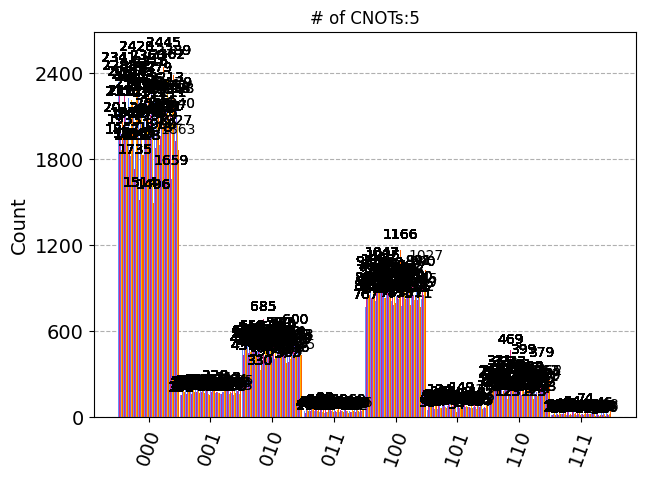

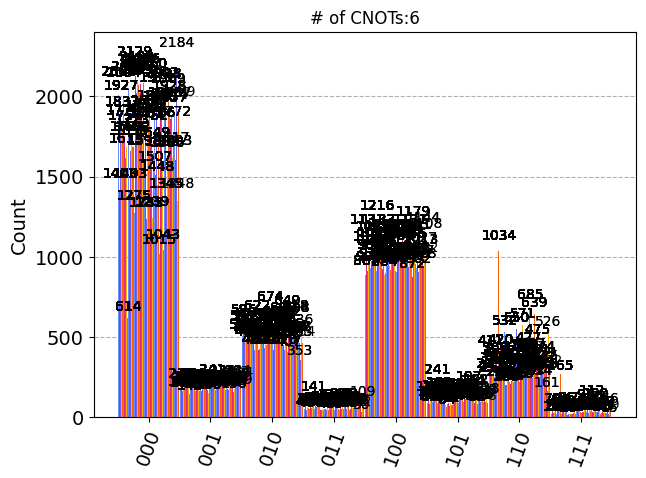

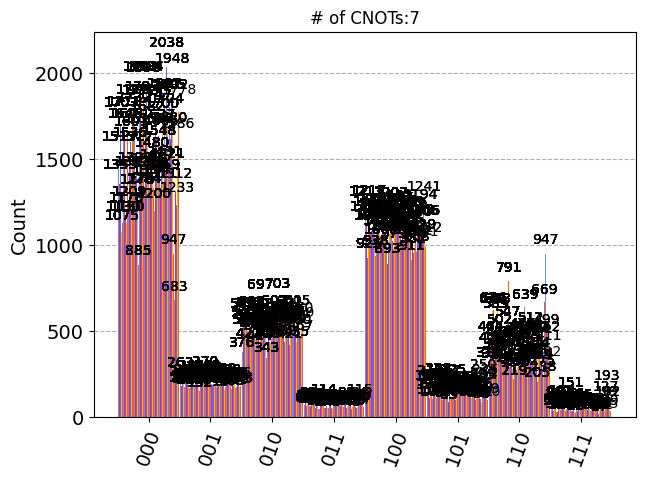

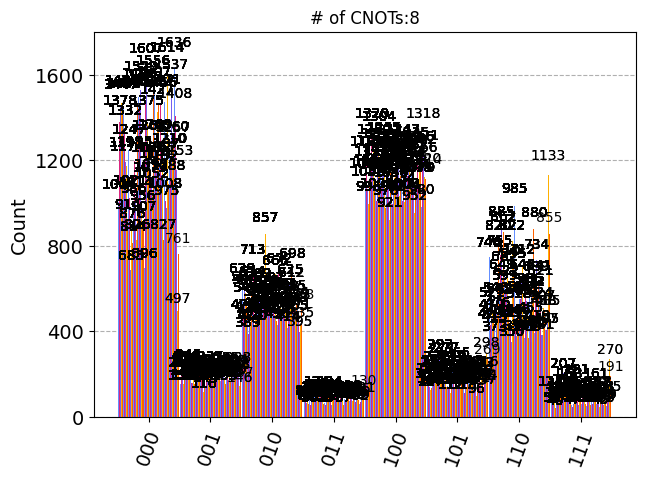

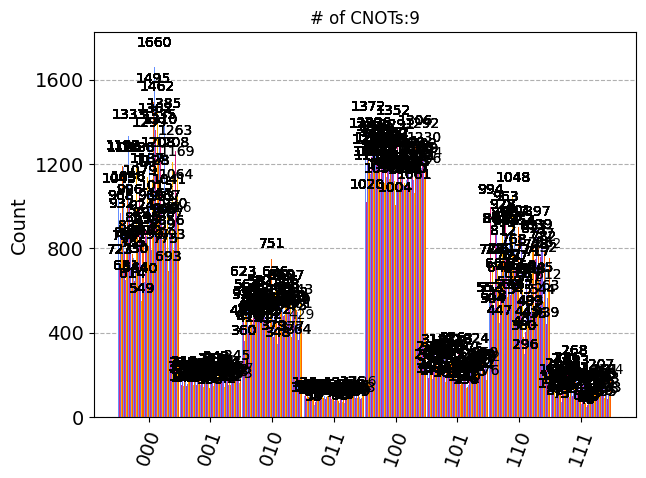

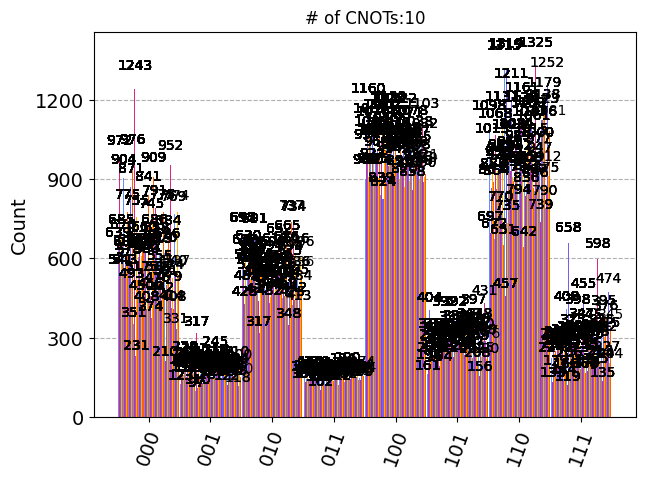

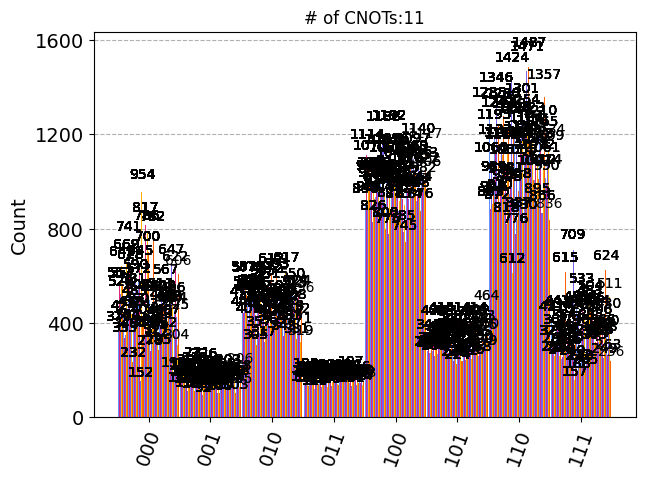

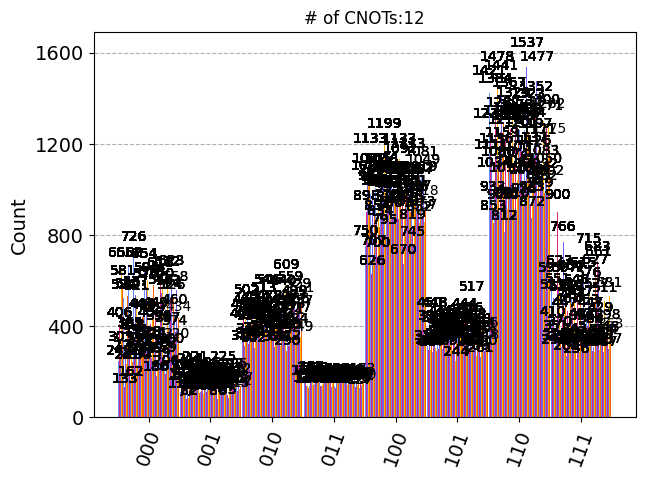

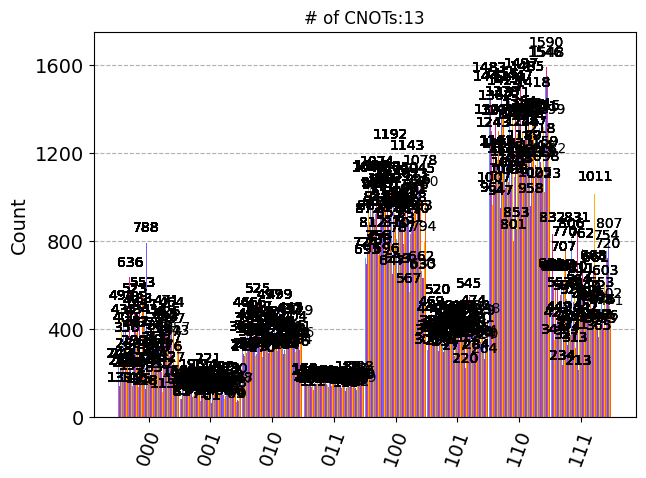

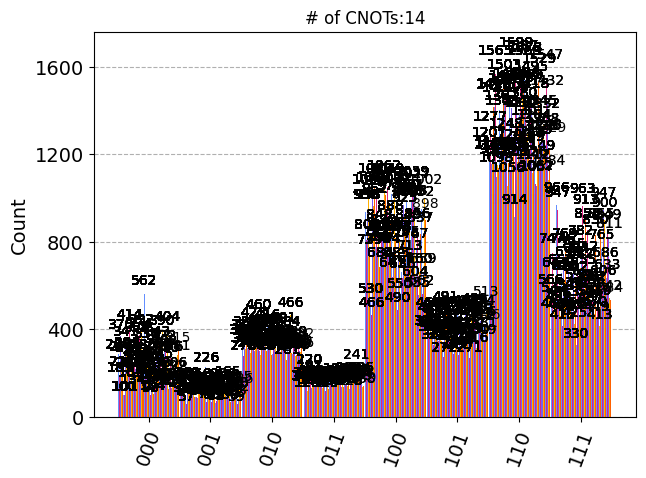

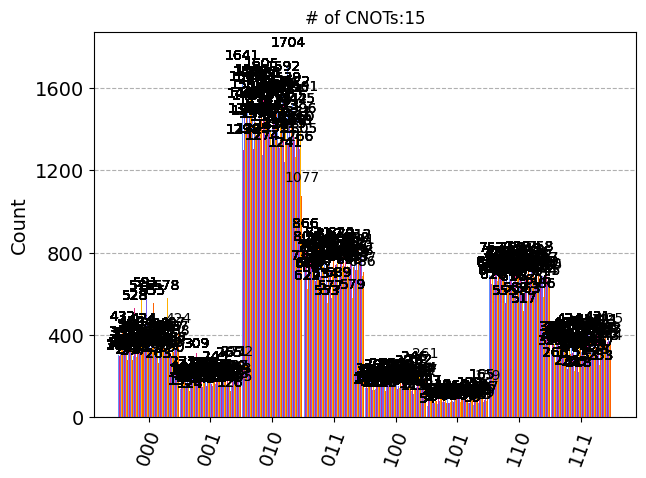

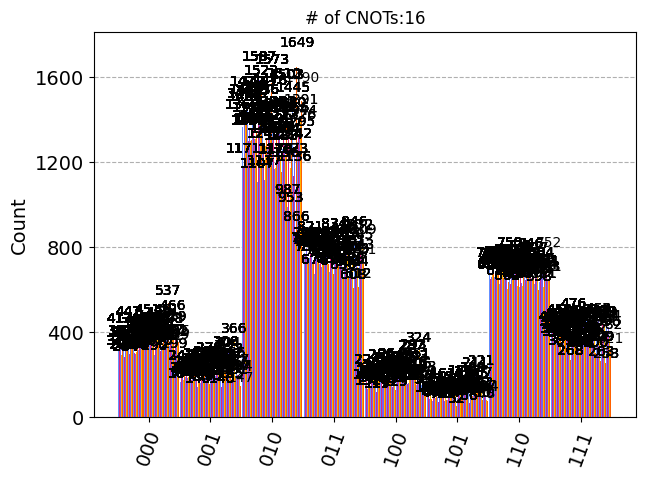

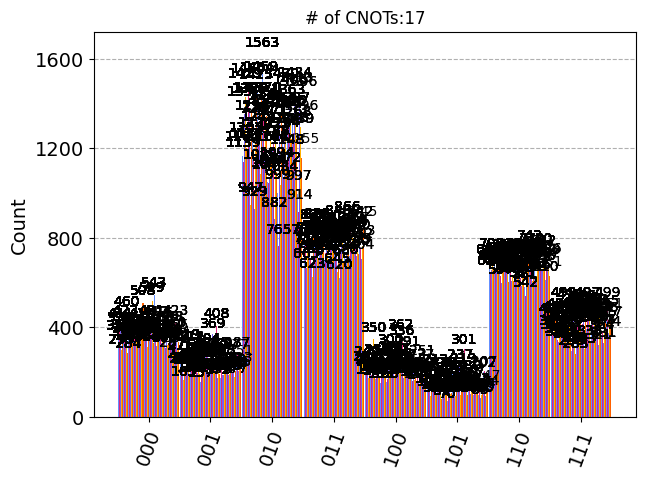

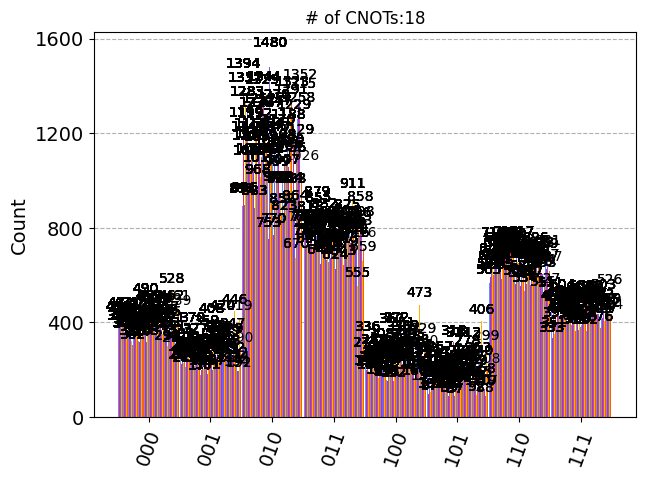

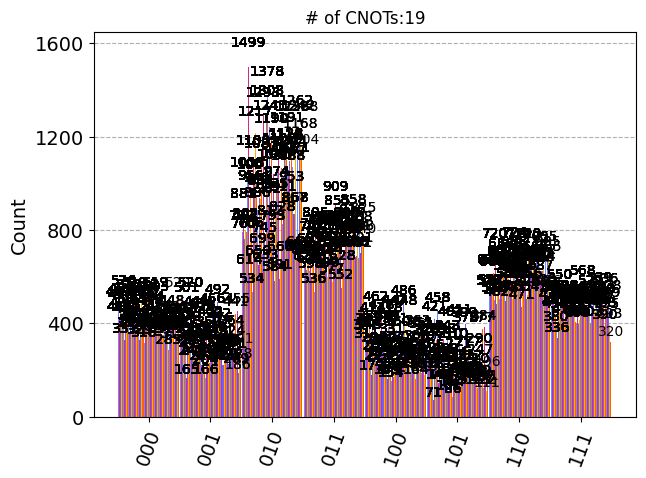

In [8]:
for cnot_count in range(k_max):
    start_index = cnot_count*random_circs_per_k
    data = qc_res_counts[start_index: start_index+random_circs_per_k]
    display(plot_histogram(data, title='# of CNOTs:{}'.format(cnot_count)))


In [49]:
from scipy import stats

depths = []
for i in range(k_max*random_circs_per_k):
    depths.append(tqcs[i].depth())

display(stats.describe(depths))

DescribeResult(nobs=1200, minmax=(7, 189), mean=64.50583333333333, variance=1313.813143591882, skewness=0.4654958602572666, kurtosis=-0.5468088495910912)

In [47]:
np.argmax(depths)

1172

In [48]:
depths[1172]

189

In [42]:
# i = np.random.randint(0, 1201)
# print(i)
# print(i//random_circs_per_k)
# print(tqcs[i].count_ops().get('cx', 0))
# print(tqcs[i].depth())

In [9]:
from scipy import stats

for cnot_count in range(k_max):
    start_index = cnot_count*random_circs_per_k
    data = []
    for i in range(start_index, start_index+random_circs_per_k):
        data.append(qc_res_counts[i]['000'])
    display(stats.describe(data))
    print('=========')


DescribeResult(nobs=60, minmax=(2832, 3063), mean=2972.35, variance=2469.214406779661, skewness=-0.7343600697399331, kurtosis=0.2630926925526853)

DescribeResult(nobs=60, minmax=(2640, 3020), mean=2869.0, variance=4651.627118644068, skewness=-0.7099614389376235, kurtosis=1.1616565759962487)

DescribeResult(nobs=60, minmax=(2453, 2860), mean=2670.4166666666665, variance=8515.806497175141, skewness=-0.20182514500854692, kurtosis=-0.3469613542593759)

DescribeResult(nobs=60, minmax=(1847, 2688), mean=2482.0, variance=24031.593220338982, skewness=-2.1349355791128612, kurtosis=6.551192271080135)

DescribeResult(nobs=60, minmax=(1564, 2563), mean=2261.383333333333, variance=27740.40988700565, skewness=-1.3211814903491705, kurtosis=4.029615153965362)

DescribeResult(nobs=60, minmax=(1496, 2445), mean=2071.766666666667, variance=41618.89378531074, skewness=-0.6105167803475534, kurtosis=0.4500868172324113)

DescribeResult(nobs=60, minmax=(614, 2184), mean=1737.8333333333333, variance=96478.7514124294, skewness=-1.2257637584075223, kurtosis=1.7228878134567838)

DescribeResult(nobs=60, minmax=(683, 2038), mean=1509.8333333333333, variance=77988.20903954802, skewness=-0.5525380305300127, kurtosis=0.1028934233772607)

DescribeResult(nobs=60, minmax=(497, 1636), mean=1205.45, variance=71472.9974576271, skewness=-0.41958862985430057, kurtosis=-0.5332150230392525)

DescribeResult(nobs=60, minmax=(549, 1660), mean=986.3833333333333, variance=59482.37598870056, skewness=0.5691452143623772, kurtosis=-0.23611026552177483)

DescribeResult(nobs=60, minmax=(210, 1243), mean=617.75, variance=35657.44491525424, skewness=0.5955339590952208, kurtosis=1.0280944037066009)

DescribeResult(nobs=60, minmax=(152, 954), mean=480.4, variance=24741.532203389834, skewness=0.5966275397257131, kurtosis=0.4407760151338356)

DescribeResult(nobs=60, minmax=(133, 726), mean=406.3, variance=23138.077966101693, skewness=0.19270577470656616, kurtosis=-1.1143438925971714)

DescribeResult(nobs=60, minmax=(113, 788), mean=318.1166666666667, variance=18492.647175141235, skewness=0.8547494909112732, kurtosis=0.9651013692759278)

DescribeResult(nobs=60, minmax=(98, 562), mean=240.28333333333333, variance=9031.833615819209, skewness=0.7502911890410094, kurtosis=0.6408375689030761)

DescribeResult(nobs=60, minmax=(263, 591), mean=360.18333333333334, variance=5503.847175141242, skewness=1.7070860174633193, kurtosis=2.6572378043082407)

DescribeResult(nobs=60, minmax=(284, 537), mean=362.56666666666666, variance=2615.741242937853, skewness=0.861350225063443, kurtosis=0.7965280916683248)

DescribeResult(nobs=60, minmax=(284, 543), mean=366.21666666666664, variance=2637.392937853107, skewness=1.395016736388733, kurtosis=2.519979206738573)

DescribeResult(nobs=60, minmax=(291, 528), mean=385.8, variance=2509.9254237288133, skewness=0.31827406835689126, kurtosis=-0.07716376032960293)

DescribeResult(nobs=60, minmax=(285, 526), mean=408.06666666666666, variance=3972.537853107345, skewness=0.3383607219013727, kurtosis=-0.9429427683516107)

In [ ]:

# cnot_counts = sorted(tqcs_by_cnot_count.keys())
# for cnot_count in cnot_counts:
#     qc_indices = tqcs_by_cnot_count[cnot_count]
#     data = []
#     for qc_index in qc_indices:
#         data.append(qc_res_counts[qc_index]['000'])
#     print(cnot_count, len(qc_indices))
#     display(stats.describe(data))
#     print('=========')
#     # display(plot_histogram(data, title='# of CNOTs:{}'.format(cnot_count)))

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Random test data
# np.random.seed(19680801)
# all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
# labels = ['x1', 'x2', 'x3']

# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# # rectangular box plot
# bplot1 = ax1.boxplot(all_data,
#                      vert=True,  # vertical box alignment
#                      patch_artist=True,  # fill with color
#                      labels=labels)  # will be used to label x-ticks
# ax1.set_title('Rectangular box plot')

# # notch shape box plot
# bplot2 = ax2.boxplot(all_data,
#                      notch=True,  # notch shape
#                      vert=True,  # vertical box alignment
#                      patch_artist=True,  # fill with color
#                      labels=labels)  # will be used to label x-ticks
# ax2.set_title('Notched box plot')

# # fill with colors
# colors = ['pink', 'lightblue', 'lightgreen']
# for bplot in (bplot1, bplot2):
#     for patch, color in zip(bplot['boxes'], colors):
#         patch.set_facecolor(color)

# # adding horizontal grid lines
# for ax in [ax1, ax2]:
#     ax.yaxis.grid(True)
#     ax.set_xlabel('Three separate samples')
#     ax.set_ylabel('Observed values')

# plt.show()

In [ ]:
# cnot_count = qc.count_ops().get('cx', 0)
#     cnot_counts.append(cnot_count)

In [ ]:
# qc = QuantumCircuit(backend.num_qubits)

# ops = [qc.cx, qc.rz, qc.sx, qc.x]

# for i in range(n):
#     rand_op_index = np.random.randint(0, len(ops))
#     rand_op = ops[rand_op_index]
#     if rand_op_index != 0:
#         qubit_index = np.random.randint(0, 2)
#         # gates with angle
#         if rand_op_index == 1:
#             angle = np.random.random()*(2*np.pi)
#             rand_op(angle, qubit_index)
#         else:
#             rand_op(qubit_index)
#     else:
#         ctrl_qubit_index = np.random.randint(0, 2)
#         if ctrl_qubit_index == 0:
#             rand_op(0, 1)
#             # qc.cx(0, 1)
#         else:
#             rand_op(1, 0)
#             # qc.cx(1, 0)

